In [ ]:
import numpy as np

%load_ext autoreload 
%autoreload 2

data = np.load('../gesture_dataset.npz', allow_pickle=True)
X = data['X']  # gestures
y = data['y']  # labels
class_to_label = data['class_to_label'].item()  # convert from 0-d object to dict

In [2]:
print("Keys in the file:", data.files)
print("Number of gestures:", len(X))
print("Number of labels:", len(y))
print("Class mapping:", class_to_label)
X.shape

Keys in the file: ['X', 'y', 'class_to_label']
Number of gestures: 47
Number of labels: 47
Class mapping: {'apartment1': 0, 'apartment_vertical_L': 1, 'concerthall': 2, 'house1': 3}


(47, 128, 3)

<module 'matplotlib.pyplot' from 'c:\\Users\\gdyer\\anaconda3\\envs\\XR_Gesture\\Lib\\site-packages\\matplotlib\\pyplot.py'>

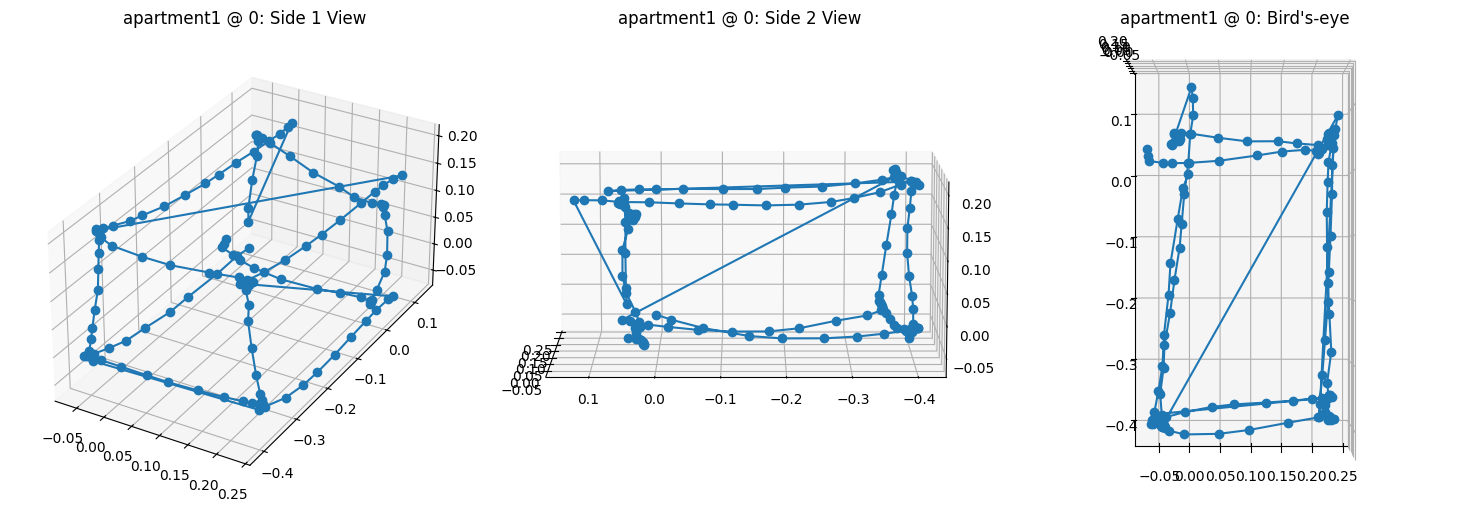

In [ ]:
import matplotlib.pyplot as plt
from raw_to_dataset import load_gesture_xyz


def show_plot(points, gesture_index = -1):
    xs, ys, zs = zip(*points)

    fig = plt.figure(figsize=(15, 5))

    label = "custom" # default empty for -1
    if (gesture_index != -1):
        label = y[gesture_index]
    
    class_name = [k for k,v in class_to_label.items() if v == label][0]


    # --- Default angle ---
    ax1 = fig.add_subplot(131, projection='3d')
    ax1.plot(xs, ys, zs, marker='o')
    ax1.set_title(f"{class_name} @ {gesture_index}: Side 1 View")

    # --- Behind view ---
    ax2 = fig.add_subplot(132, projection='3d')
    ax2.plot(xs, ys, zs, marker='o')
    ax2.view_init(elev=10, azim=180)
    ax2.set_title(f"{class_name} @ {gesture_index}: Side 2 View")

    # --- Bird's-eye view ---
    ax3 = fig.add_subplot(133, projection='3d')
    ax3.plot(xs, ys, zs, marker='o')
    ax3.view_init(elev=90, azim=-90)
    ax3.set_title(f"{class_name} @ {gesture_index}: Bird's-eye")

    ax1.set_aspect('equal', adjustable='box')
    ax2.set_aspect('equal', adjustable='box')
    ax3.set_aspect('equal', adjustable='box')

    plt.tight_layout()
    return plt

# First index 
show_plot(X[0], 0)

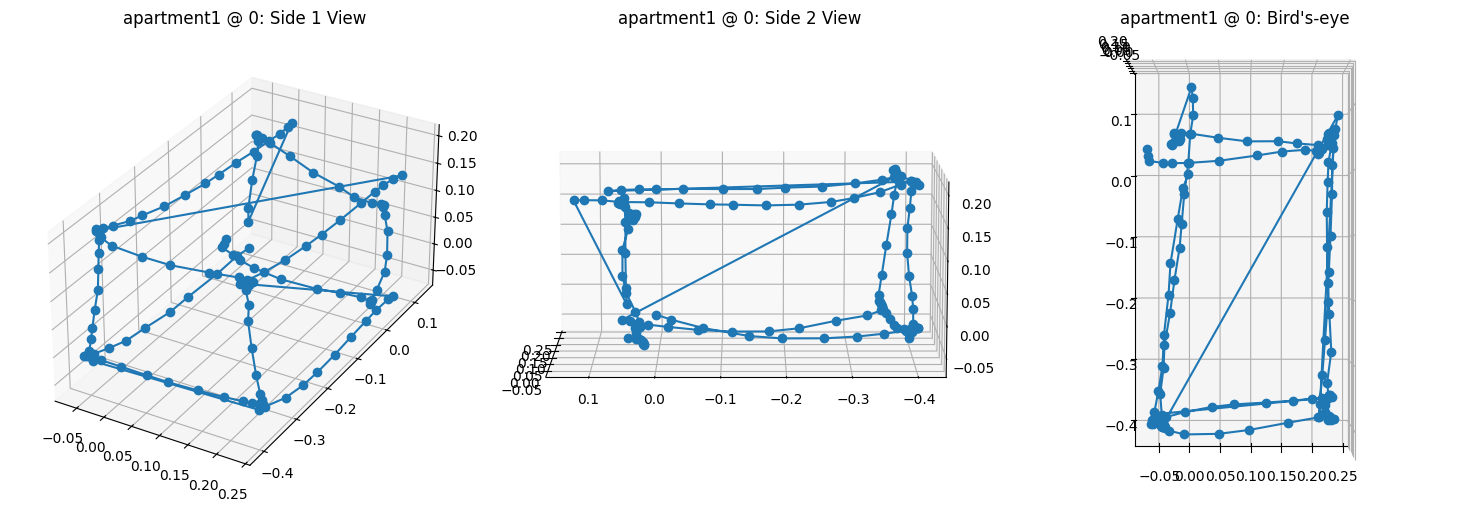

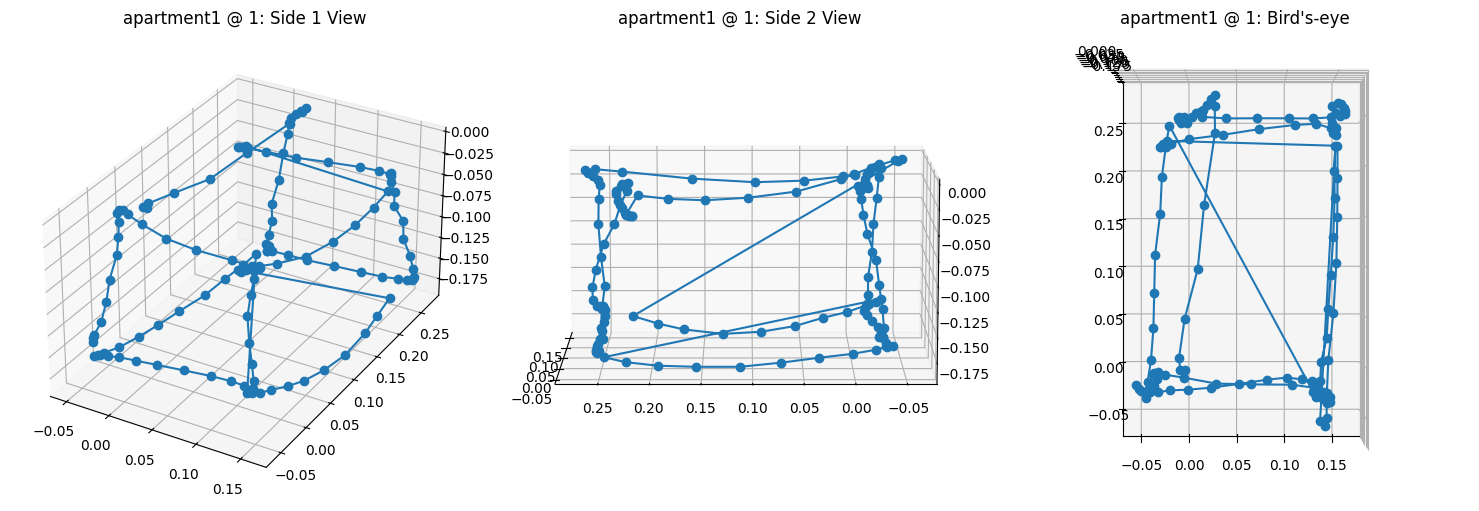

In [ ]:
from raw_to_dataset import sample_points_fixed

for i in range(len(X)): # modify range to view dataset
    interp = X[i].copy()
    show_plot(interp, i)

In [20]:
def compute_distance_matrix(points):
    """
    points: (num_points, 3)
    returns: (num_points, num_points) distance matrix
    """
    points = np.asarray(points, dtype=np.float32)
    diff = points[:, np.newaxis, :] - points[np.newaxis, :, :]
    dist_matrix = np.linalg.norm(diff, axis=-1)
    return dist_matrix
# points_test = np.array(X[0])
compute_distance_matrix(X[0])

array([[0.        , 0.02557365, 0.07615367, ..., 0.07246339, 0.07613196,
        0.08205571],
       [0.02557365, 0.        , 0.05089965, ..., 0.0736217 , 0.07961656,
        0.08832628],
       [0.07615367, 0.05089965, 0.        , ..., 0.10467471, 0.11267085,
        0.12369992],
       ...,
       [0.07246339, 0.0736217 , 0.10467471, ..., 0.        , 0.00862618,
        0.02054313],
       [0.07613196, 0.07961656, 0.11267085, ..., 0.00862618, 0.        ,
        0.01192077],
       [0.08205571, 0.08832628, 0.12369992, ..., 0.02054313, 0.01192077,
        0.        ]], shape=(128, 128), dtype=float32)